# Code to pull data

In [44]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pandas_datareader import DataReader as pdr
import statsmodels.api as sm
import warnings
import random
warnings.simplefilter(action="ignore", category=FutureWarning)

Construct beta and excess return for each stock

In [45]:
# estimate beta

def estimate_beta(ticker, ff, start_date='2019-01-01', end_date='2024-01-01', plot = False):
    """
    Estimates beta for a given stock using monthly returns.
    """


    # Get stock data and compute monthly returns.
    stock = yf.download(ticker, start=start_date, end = end_date, progress=False)['Close']


    stock_ret = stock.resample('ME').last().pct_change()
    # Convert the Series into a DataFrame so its name ("ret") is kept as a column
    stock_ret = stock_ret[ticker].to_frame(name="ret")
    # Convert its index to Timestamps (month-end) as well
    # Combine the data on the timestamp index.
    df = ff.join(stock_ret, how="inner")

    # Drop any observations that are NaN.
    df = df.dropna()

    # Compute excess returns (subtract risk-free rate).
    df["ret"] = df["ret"] - df["RF"]

    # Run regression: regress stock excess returns on market excess returns.
    beta, alpha, r_value, p_value, std_err = stats.linregress(
        df['Mkt-RF'], df['ret'])

    # Create the regression plot.
    if plot:
        plt.figure(figsize=(10, 6))
        plt.scatter(df['Mkt-RF'], df['ret'], alpha=0.5)
        plt.plot(df['Mkt-RF'], alpha + beta * df['Mkt-RF'], color='red',
                label=f'Beta: {beta:.2f}, Alpha: {alpha:.3f}')
        plt.xlabel('Market Excess Return')
        plt.ylabel(f'{ticker} Excess Return')
        plt.title(f'CAPM Regression for {ticker}')
        plt.legend()
        plt.grid(True)

    return {
        'beta': beta,
        'alpha': alpha,
        'r_squared': r_value**2,
        'p_value': p_value,
        'std_err': std_err,
        'excess_returns': df['ret'].mean()
    }

# Get Fama-French Data (monthly factors) and convert its index to Timestamps.
ff = pdr('F-F_Research_Data_Factors', 'famafrench', start=1970)[0] / 100
# Convert the index to Timestamps (we assume these represent month-end dates)
ff.index = ff.index.to_timestamp('M')

estimate_beta('NVDA', ff,
              start_date='2019-01-01', end_date='2024-01-01', plot = True)

{'beta': 1.618238850552884,
 'alpha': 0.03703391027635448,
 'r_squared': 0.3883590191182962,
 'p_value': 1.3542717814852344e-07,
 'std_err': 0.2689904032147405,
 'excess_returns': 0.05423112653561987}

Error in callback <function flush_figures at 0x289ce28e0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:


# URL for the Wikipedia page containing S&P 500 companies
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# Use pandas to read all tables on the page
tables = pd.read_html(url)

sp500_table = tables[0]

# Extract the tickers from the 'Symbol' column
tickers = sp500_table['Symbol'].tolist()

# Optionally, adjust tickers if needed (e.g., replace periods with hyphens for yfinance)
tickers = [ticker.replace('.', '-') for ticker in tickers]


# Estimate beta for each stock in the S&P 500
# (randomly sample 100)
# Randomly sample 100 tickers
sampled_tickers = random.sample(tickers, 100)

results = {}
for ticker in tickers:
    try:
        result = estimate_beta(ticker, ff,
                               start_date='2019-01-01', end_date='2024-01-01', plot=False)
        results[ticker] = result
    except Exception as e:
        print(f"Error processing {ticker}: {e}")
        continue

# Convert results to DataFrame
results_df = pd.DataFrame(results).T


1 Failed download:
['ABNB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing ABNB: Inputs must not be empty.


/Users/psg24/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/psg24/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/psg24/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)

1 Failed download:
['ANET']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing ANET: Inputs must not be empty.



1 Failed download:
['CZR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing CZR: Inputs must not be empty.



1 Failed download:
['CARR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing CARR: Inputs must not be empty.



1 Failed download:
['CFG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing CFG: Inputs must not be empty.



1 Failed download:
['CEG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing CEG: Inputs must not be empty.



1 Failed download:
['CTVA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing CTVA: Inputs must not be empty.



1 Failed download:
['CRWD']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing CRWD: Inputs must not be empty.



1 Failed download:
['DAY']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing DAY: Inputs must not be empty.



1 Failed download:
['DELL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing DELL: Inputs must not be empty.



1 Failed download:
['DOW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing DOW: Inputs must not be empty.


Could not get exchangeTimezoneName for ticker 'ETR' reason: 'chart'

1 Failed download:
['ETR']: YFTzMissingError('possibly delisted; no timezone found')


Error processing ETR: Inputs must not be empty.



1 Failed download:
['FTV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing FTV: Inputs must not be empty.



1 Failed download:
['FOXA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing FOXA: Inputs must not be empty.



1 Failed download:
['FOX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing FOX: Inputs must not be empty.



1 Failed download:
['GEHC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing GEHC: Inputs must not be empty.



1 Failed download:
['GEV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing GEV: Inputs must not be empty.



1 Failed download:
['GDDY']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing GDDY: Inputs must not be empty.



1 Failed download:
['HPE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing HPE: Inputs must not be empty.
Error processing HLT: Inputs must not be empty.



1 Failed download:
['HWM']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing HWM: Inputs must not be empty.



1 Failed download:
['IR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing IR: Inputs must not be empty.



1 Failed download:
['INVH']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing INVH: Inputs must not be empty.



1 Failed download:
['KVUE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing KVUE: Inputs must not be empty.



1 Failed download:
['KEYS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing KEYS: Inputs must not be empty.



1 Failed download:
['KHC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing KHC: Inputs must not be empty.



1 Failed download:
['LW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing LW: Inputs must not be empty.


Could not get exchangeTimezoneName for ticker 'LEN' reason: 'chart'

1 Failed download:
['LEN']: YFTzMissingError('possibly delisted; no timezone found')


Error processing LEN: Inputs must not be empty.



1 Failed download:
['MRNA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing MRNA: Inputs must not be empty.



1 Failed download:
['OTIS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing OTIS: Inputs must not be empty.



1 Failed download:
['PLTR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing PLTR: Inputs must not be empty.



1 Failed download:
['PAYC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing PAYC: Inputs must not be empty.



1 Failed download:
['PYPL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing PYPL: Inputs must not be empty.



1 Failed download:
['SW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing SW: Inputs must not be empty.



1 Failed download:
['SOLV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing SOLV: Inputs must not be empty.



1 Failed download:
['SYF']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing SYF: Inputs must not be empty.



1 Failed download:
['UBER']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing UBER: Inputs must not be empty.



1 Failed download:
['VLTO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing VLTO: Inputs must not be empty.



1 Failed download:
['VICI']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing VICI: Inputs must not be empty.



1 Failed download:
['VST']: YFPricesMissingError('possibly delisted; no price data found  (1d 2009-01-01 -> 2014-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1230786000, endDate = 1388552400")')


Error processing VST: Inputs must not be empty.


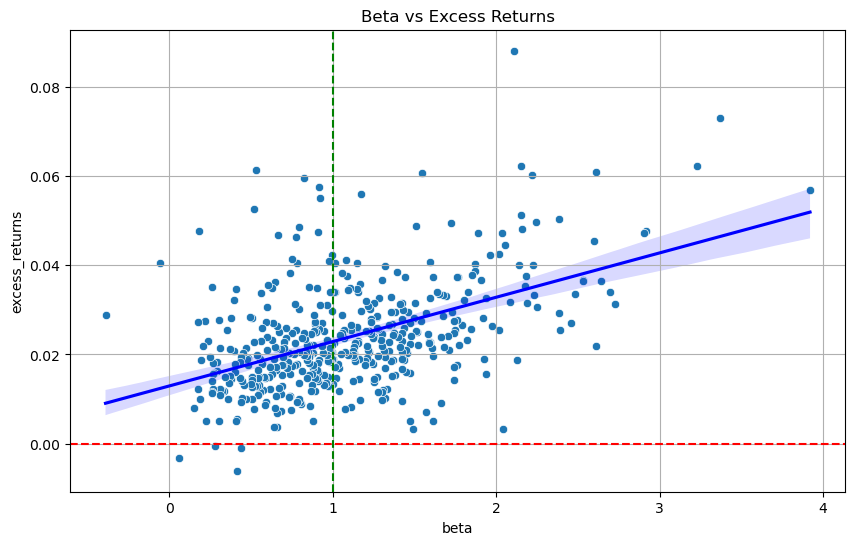

                            OLS Regression Results                            
Dep. Variable:         excess_returns   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     98.85
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           3.15e-21
Time:                        14:54:43   Log-Likelihood:                 1446.7
No. Observations:                 462   AIC:                            -2889.
Df Residuals:                     460   BIC:                            -2881.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0129      0.001     11.275      0.0

In [ ]:
results_df = results_df.sort_values(by='beta', ascending=False)

# plot beta vs excess returns 

plt.figure(figsize=(10, 6))

sns.scatterplot(data=results_df, x='beta', y='excess_returns')
plt.title('Beta vs Excess Returns')
plt.xlabel('Beta')
plt.ylabel('Excess Returns')
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x=1, color='g', linestyle='--')
plt.grid(True)
#add a fitted line
sns.regplot(data=results_df, x='beta', y='excess_returns', scatter=False, color='blue')
plt.show()

results_df = results_df.dropna()
# run regression of beta on excess returns with robust standard errors

X = sm.add_constant(results_df['beta'])
y = results_df['excess_returns']
# Fit the model with robust standard errors
model = sm.OLS(y, X).fit(cov_type='HC3')
print(model.summary())

# print mean market return in excess of the risk-free rate
print(
    f"Mean market return in excess of the risk-free rate: {ff.loc['2019-01-01':'2024-01-01']['Mkt-RF'].mean()}")

In [50]:
# Calculate betas using 2019-2024
results_df['beta'] = results_df['beta'].astype(float)

# sort by beta and create 10 portfolios in 2024
# Sort tickers into 10 equally sized portfolios based on beta
results_df['portfolio'] = pd.qcut(results_df['beta'], 10, labels=False)

# Calculate betas and excess returns for each portfolio for 2024-01-01 to 2025-01-01
portfolio_results = []

for portfolio in range(10):
    portfolio_tickers = results_df[results_df['portfolio'] == portfolio].index.tolist()
    
    portfolio_returns = []
    portfolio_beta = []
    try:
        # Get stock data for portfolio and construct return series
        portfolio_data = yf.download(portfolio_tickers, start='2024-01-01', end='2025-01-01', progress=False)['Close']
        portfolio_returns = portfolio_data.resample('ME').last().pct_change()
        print(portfolio_returns)
        # Convert the DataFrame into a Series so its name ("ret") is kept as a column
        portfolio_returns = portfolio_returns.mean(axis=1).to_frame(name="ret")
        # subtract risk-free rate
        portfolio_returns = portfolio_returns - ff['RF'].resample('M').mean()
        # Run regression: regress portfolio excess returns on market excess returns.
        result = stats.linregress(ff['Mkt-RF'].loc['2024-01-01':'2025-01-01'], portfolio_returns['ret'])
        # extract beta
        beta = result.slope
        # extract excess returns
        excess_returns = portfolio_returns['ret'].mean()

    except Exception as e:
        print(f"Error processing {ticker}: {e}")
        continue
    
    portfolio_returns =     np.mean(portfolio_returns)
    portfolio_beta = np.mean(portfolio_beta)

    
    portfolio_results.append({
        'portfolio': portfolio,
        'beta': portfolio_beta,
        'excess_returns': portfolio_returns
    })

# Convert portfolio results to DataFrame
portfolio_results_df = pd.DataFrame(portfolio_results)
print(portfolio_results_df)

# calculate betas and excess returns for each portfolio  for 2024


47 Failed downloads:
['MNST', 'KMB', 'NCLH', 'HRL', 'NEM', 'ORLY', 'AMT', 'DLTR', 'ENPH', 'FE', 'ED', 'WDAY', 'AXON', 'AWK', 'XEL', 'ES', 'CPRT', 'MKC', 'PCG', 'CL', 'LKQ', 'PPL', 'COO', 'AZO', 'AKAM', 'TJX', 'AEP', 'GIS', 'DXCM', 'WEC', 'CMS', 'CPB', 'PEP', 'PEG', 'HSY', 'VRTX', 'D', 'CHD', 'AMCR', 'SRE', 'SO', 'WMT', 'DG', 'MCD', 'VRSK', 'VZ', 'DUK']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Empty DataFrame
Columns: [AEP, AKAM, AMCR, AMT, AWK, AXON, AZO, CHD, CL, CMS, COO, CPB, CPRT, D, DG, DLTR, DUK, DXCM, ED, ENPH, ES, FE, GIS, HRL, HSY, KMB, LKQ, MCD, MKC, MNST, NCLH, NEM, ORLY, PCG, PEG, PEP, PPL, SO, SRE, TJX, VRSK, VRTX, VZ, WDAY, WEC, WMT, XEL]
Index: []

[0 rows x 47 columns]
Error processing COST: Inputs must not be empty.



46 Failed downloads:
['KR', 'ABT', 'SJM', 'NEE', 'T', 'EVRG', 'CNP', 'PNW', 'MTCH', 'KDP', 'ACGL', 'EIX', 'V', 'IBM', 'K', 'MRK', 'BALL', 'EG', 'ZTS', 'EXC', 'CLX', 'EW', 'DTE', 'TSLA', 'JNJ', 'LH', 'ADM', 'NOW', 'MO', 'PG', 'CBOE', 'BF-B', 'ATO', 'MA', 'LNT', 'BRK-B', 'KO', 'INTU', 'SHW', 'SNPS', 'AMGN', 'DVA', 'LLY', 'AEE', 'COST', 'BMY']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Empty DataFrame
Columns: [ABT, ACGL, ADM, AEE, AMGN, ATO, BALL, BF-B, BMY, BRK-B, CBOE, CLX, CNP, COST, DTE, DVA, EG, EIX, EVRG, EW, EXC, IBM, INTU, JNJ, K, KDP, KO, KR, LH, LLY, LNT, MA, MO, MRK, MTCH, NEE, NOW, PG, PNW, SHW, SJM, SNPS, T, TSLA, V, ZTS]
Index: []

[0 rows x 46 columns]
Error processing COST: Inputs must not be empty.



46 Failed downloads:
['TRV', 'BG', 'COR', 'SBAC', 'WST', 'WRB', 'ROST', 'CAG', 'ADP', 'LDOS', 'FIS', 'GILD', 'DGX', 'ROL', 'BDX', 'TGT', 'HSIC', 'NRG', 'PFE', 'TMO', 'WM', 'BAX', 'NI', 'MTB', 'TSN', 'XOM', 'ERIE', 'ECL', 'SYY', 'JKHY', 'BR', 'MCK', 'CINF', 'AMZN', 'TDG', 'CHTR', 'AON', 'RMD', 'MDLZ', 'DLR', 'KMI', 'MMC', 'WELL', 'O', 'CAH', 'CMG']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Empty DataFrame
Columns: [ADP, AMZN, AON, BAX, BDX, BG, BR, CAG, CAH, CHTR, CINF, CMG, COR, DGX, DLR, ECL, ERIE, FIS, GILD, HSIC, JKHY, KMI, LDOS, MCK, MDLZ, MMC, MTB, NI, NRG, O, PFE, RMD, ROL, ROST, SBAC, SYY, TDG, TGT, TMO, TRV, TSN, WELL, WM, WRB, WST, XOM]
Index: []

[0 rows x 46 columns]
Error processing COST: Inputs must not be empty.


KeyboardInterrupt: 

In [51]:
# plot scatterplot o10 portfolios of stocks' beta # vs excess returns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=portfolio_results_df, x='beta', y='excess_returns')
plt.title('Excess Returns by Portfolio')
plt.xlabel('Beta')
plt.ylabel('Excess Returns')
plt.axvline(x=1, color='r', linestyle='--')
plt.grid(True)
plt.show()

# annualize the daily returns
portfolio_results_df['annualized_excess_returns'] = portfolio_results_df['excess_returns'] * 252

# run regression of beta on annualized excess returns with robust standard errors
X = sm.add_constant(portfolio_results_df['beta'])
y = portfolio_results_df['annualized_excess_returns']
# Fit the model with robust standard errors
model = sm.OLS(y, X).fit(cov_type='HC3')
print(model.summary())



ValueError: Could not interpret value `beta` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>